# Coursera Machine Learning
## Programming Assignment : Linear Regression

본 과제는 매트랩으로 진행되는 과제이나, 매트랩을 잘 쓸 줄 모르는 관계로 파이썬으로 구현하였다.

과제 설명 파일에 제시된 부분을 구현하였다.

## 1. Simple Octave/MATLAB function
* warmUpExercise.m 구현
* 5X5 indentity matrix return

In [4]:
import numpy as np

In [5]:
def warmUpExercise():
    A = np.eye(5)
    return A

In [6]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2. Linear regression with one variable
이번 파트에서는, 하나의 변수를 가진 선형 회귀를 사용하여 푸드 트럭의 이윤을 예측할 것이다.

* ex1data.txt 파일은 linear regression을 위한 데이터셋을 포함하고 있다.
    * 첫 번째 컬럼은 도시의 인구 수, 두 번째 컬럼은 푸드 트럭의 이윤이다(?)
    * negative value는 손실(loss)를 나타낸다.

### 2-1. Plotting the Data
Task를 시작하기 전에, 데이터를 이해하는 것은 유용하다 시각화함으로써.

어쩌구 저쩌구

```
data = load('ex1data1.txt');
X = data(:, 1); y = data(:, 2);
m = length(y);
```

* plotData.m을 구현하여 plot 그리기
* 다음 코드를 채워 넣어라
```
plot(x, y, 'rx', 'MarkerSize', 10);
ylabel('Profit in $10,000s');
xlabel('Population of City in 10,000s');
```

In [7]:
import matplotlib.pyplot as plt

In [91]:
def plotData(x, y):
    plt.figure()
    plt.scatter(x, y, marker='x', c='red', s=50)
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    #plt.show()

In [105]:
data = np.loadtxt('ex1data1.txt', delimiter=',') #read comma separated data

X = data[:, 0]
y = data[:, 1]
print(X.shape)
print(np.size(y))
print(X.shape[0])

m = np.size(y) #number of training examples
print(m)

(97,)
97
97
97


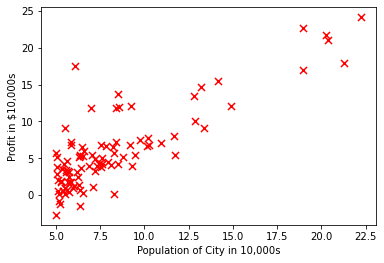

In [106]:
plotData(X, y)

### 2-2.Gradient Desent
#### 2-2-1. Update Equation
* 수식

#### 2-2-2. Implementation
* theta값이 들어갈 차원을 하나 추가한다.
* 초기 파라미터를 0으로 초기화한다.
* 학습률(alpha)은 0.01로 초기화한다.

#### 2-2-3.Computing the cost J(theta)
* **computeCost.m** 구현 - J(theta)를 계산하는 함수
* 기억해라 변수 X와 y는 스칼라 값이 아니고, 트레이닝 셋에서 example을 나타내는 row로 구성된 행렬이라는 점이다.
* cost는 **32.07**이어야 한다.

#### 2-2-4.Gradient Descent
* 다음으로, **gradientDescent.m** 파일에서 gradient descent를 구현해라.
* loop가 사용되었고, 너는 단지 업데이트 theta를 공급할 필요가 있다 각 iteration 안에서.
* 네가 뭘 최적화하려 하고, 뭘 업데이트 하는지 확실히 하라. cost J(theta)는 vector theta에 의해서 parameterized 되었다.
    * 즉, 우리는 X와 y가 아닌 vector theta를 이용하여 cost를 최소화하는 것이다.
* gradient descent가 잘 동작하고 있는지 확인하는 좋은 방법은 J(theta)의 값을 보고, 이것이 각 단계마다 감소하고 있는지 확인하는 것이다.
    * 잘 구현했다면 cost J(theta)의 값은 절대 증가하지 않아야 한다.
    * 알고리즘의 끝에서는 일정한 값으로 수렴해야 한다.
* 끝냈으면, 마지막 파라미터를 이용해서 linear fit 값을 plot할 것이다.
* 최종 theta값은 35,000명과 70,000명이 사는 지역의 이윤을 예측하기 위해 사용될 것이다.

In [122]:
# Implement
X = np.zeros((m, 2))
X[:, 0] = np.ones(m)
X[:, 1] = data[:, 0]
print(X.shape)

theta = np.zeros(2)
print(theta)
iterations = 1500
alpha = 0.01

(97, 2)
[0. 0.]


In [123]:
#ComputeCost.m
def computeCost(X, y, theta):
    m, n = X.shape #number of training examples
    J = 0 #초기화
    
    # X: 97X2, theta: 2X1 => dot production: 97X1
    pred = X.dot(theta)
    J = (1 / (2*m)) * np.sum((pred-y)**2)
    
    return J

In [124]:
answer = computeCost(X, y, theta)
print(f'{answer}')
print('answer = {:.2f}'.format(answer))

32.072733877455676
answer = 32.07


In [125]:
#gradientDesent.m
def gradientDescent(X, y, theta, alpha, num_iters):
    m = np.size(y)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        pred = X.dot(theta)
        delta = (1 / m) * (pred - y).T.dot(X)
        theta = theta - alpha*delta.T
        
        J_history[i] = computeCost(X, y, theta)
        print("cost: {}".format(J_history[i]))
    
    return theta, J_history

In [126]:
theta, j = gradientDescent(X, y, theta, alpha, iterations)
print("final cost: {}".format(j[-1]))

cost: 6.737190464870006
cost: 5.9315935686049555
cost: 5.901154707081388
cost: 5.895228586444221
cost: 5.8900949431173295
cost: 5.885004158443647
cost: 5.879932480491418
cost: 5.874879094762575
cost: 5.869843911806385
cost: 5.86482686531293
cost: 5.859827889932181
cost: 5.85484692057229
cost: 5.849883892376587
cost: 5.844938740722034
cost: 5.840011401218361
cost: 5.835101809707226
cost: 5.830209902261388
cost: 5.825335615183863
cost: 5.820478885007099
cost: 5.815639648492154
cost: 5.810817842627869
cost: 5.806013404630044
cost: 5.801226271940628
cost: 5.7964563822269
cost: 5.7917036733806535
cost: 5.7869680835173956
cost: 5.782249550975539
cost: 5.777548014315596
cost: 5.7728634123193805
cost: 5.768195683989212
cost: 5.76354476854712
cost: 5.758910605434047
cost: 5.754293134309077
cost: 5.749692295048628
cost: 5.745108027745684
cost: 5.740540272709012
cost: 5.735988970462381
cost: 5.731454061743792
cost: 5.726935487504702
cost: 5.722433188909257
cost: 5.717947107333528
cost: 5.71347718

cost: 4.649374222036858
cost: 4.648753236934556
cost: 4.648134488584754
cost: 4.647517968930801
cost: 4.646903669945062
cost: 4.64629158362882
cost: 4.6456817020121655
cost: 4.645074017153899
cost: 4.644468521141423
cost: 4.6438652060906405
cost: 4.643264064145856
cost: 4.642665087479662
cost: 4.6420682682928565
cost: 4.6414735988143185
cost: 4.6408810713009245
cost: 4.64029067803744
cost: 4.63970241133642
cost: 4.6391162635381065
cost: 4.638532227010339
cost: 4.637950294148439
cost: 4.637370457375124
cost: 4.636792709140407
cost: 4.636217041921488
cost: 4.6356434482226705
cost: 4.635071920575256
cost: 4.634502451537443
cost: 4.633935033694241
cost: 4.633369659657368
cost: 4.632806322065146
cost: 4.632245013582422
cost: 4.63168572690046
cost: 4.63112845473685
cost: 4.630573189835415
cost: 4.630019924966111
cost: 4.6294686529249365
cost: 4.628919366533842
cost: 4.62837205864063
cost: 4.627826722118864
cost: 4.627283349867779
cost: 4.626741934812184
cost: 4.626202469902373
cost: 4.625664

cost: 4.49284488760432
cost: 4.492787712131476
cost: 4.492730742601387
cost: 4.492673978272259
cost: 4.492617418404968
cost: 4.4925610622630545
cost: 4.492504909112712
cost: 4.492448958222777
cost: 4.492393208864718
cost: 4.4923376603126295
cost: 4.49228231184322
cost: 4.492227162735802
cost: 4.492172212272289
cost: 4.492117459737174
cost: 4.492062904417529
cost: 4.492008545602999
cost: 4.491954382585781
cost: 4.491900414660624
cost: 4.491846641124821
cost: 4.49179306127819
cost: 4.491739674423075
cost: 4.49168647986433
cost: 4.491633476909316
cost: 4.491580664867888
cost: 4.4915280430523845
cost: 4.491475610777624
cost: 4.491423367360893
cost: 4.491371312121932
cost: 4.491319444382939
cost: 4.491267763468548
cost: 4.491216268705829
cost: 4.491164959424272
cost: 4.4911138349557875
cost: 4.4910628946346876
cost: 4.491012137797685
cost: 4.49096156378388
cost: 4.490911171934753
cost: 4.4908609615941595
cost: 4.490810932108316
cost: 4.4907610828257924
cost: 4.490711413097508
cost: 4.490661

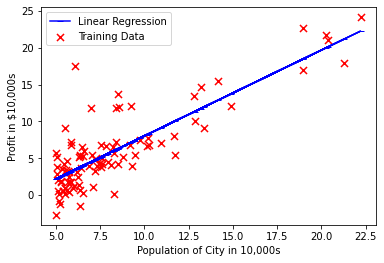

In [127]:
#linear fit plot
plotData(X[:, 1], y) #이전 그래프

plt.plot(X[:, 1], X.dot(theta), marker='_', c='blue') #cost 그래프
plt.legend(('Linear Regression', 'Training Data'))

In [128]:
#profit 예측하기
predict1 = np.sum([1, 3.5] * theta)
predict2 = np.sum([1, 7] * theta)

print("인구 수가 35,000일 때 예상 수익: {:f}".format(predict1 * 10000))
print("인구 수가 70,000일 때 예상 수익: {:f}".format(predict2 * 10000))

인구 수가 35,000일 때 예상 수익: 4519.767868
인구 수가 70,000일 때 예상 수익: 45342.450129


## 2-3. Debugging
gradient descent를 matlab에서 구현할 때 기억할 것

* matlab 인덱스는 1부터 시작한다. 

## 2-4.Visualizing J(theta)
cost function인 J(theta)값을 더 잘 이해하기 위해 2차원 grid 위에 theta0, theta1 값을 plot 해 본다.

* 매트랩 예시코드가 있음.
* 이 코드를 실행하고 나면, 너는 J(theta)의 2차원 배열을 갖게 될 것이다.
* 이 값을 이용하고, surf와 contour 명령어를 사용하여 J(theta)의 produce surface와 contour plot을 그린다.
* 이러한 그래프의 목적은 theta0과 theta1값의 변화에 따라 J(theta)값이 어떻게 변하는지 보여주는 것이다.
* cost function J(theta)는 밥그릇 모양이며 global minimum을 갖는다. 이 점이 최적의 theta0, theta1 점이며, gradient descent의 각 단계는 이 점에 가까워지도록 이동한다.